#### import necessary library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_excel(r"C:\Users\ebuka\Desktop\python\SuperStoreUS-2015.xlsx")

In [21]:
df

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,East,West Virginia,Fairmont,26554,2015-04-04,2015-04-04,-24.7104,15,135.78,87537


In [25]:
# 1. Drop duplicates
df = df.drop_duplicates()

# 2. Handle missing values:
# Fill missing numerical values with median
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Fill missing categorical values with the mode (most frequent value)
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# 3. Convert Data Types:
# Convert 'Order Date' and 'Ship Date' to datetime format if available
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
if 'Ship Date' in df.columns:
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# 4. Remove columns with too many missing values (e.g., more than 50%)
missing_threshold = 0.5  # 50% threshold
df = df.dropna(axis=1, thresh=len(df) * missing_threshold)

# 5. Standardize text data (trim spaces, make lowercase for categorical columns)
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip().str.lower())

# Reset index after cleaning
df = df.reset_index(drop=True)

# Display basic info after cleaning
print("Data cleaned successfully!")
print(df.info())

Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object     

In [27]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64


#### 1. What is the total revenue generated by the store?


In [30]:
total_revenue = df['Sales'].sum()
print(f"Total revenue generated by the store: ${total_revenue:,.2f}")


Total revenue generated by the store: $1,924,337.88



#### 2. Which category of products contributes the most to sales?

In [41]:
category_sales = df.groupby('Product Category')['Sales'].sum().sort_values(ascending=False)
top_category = category_sales.idxmax()
top_category_sales = category_sales.max()
print(f"Category contributing the most to sales: {top_category} (${top_category_sales:,.2f})")


Category contributing the most to sales: technology ($712,264.95)


#### 3. How has the sales trend been for the past year?

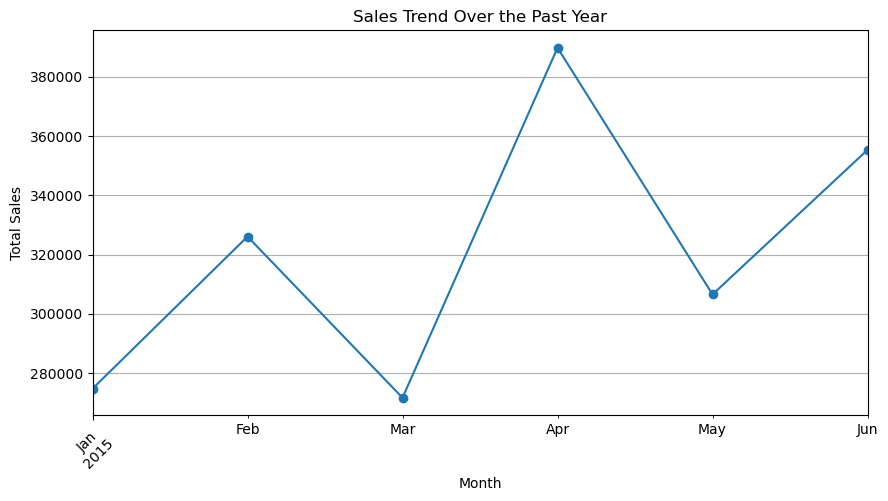

In [44]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Ensure dates are in datetime format
df['Year-Month'] = df['Order Date'].dt.to_period('M')  # Extract Year-Month for grouping

monthly_sales = df.groupby('Year-Month')['Sales'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', linestyle='-')
plt.title('Sales Trend Over the Past Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 4. Which region has the highest and lowest sales?

In [47]:
region_sales = df.groupby('Region')['Sales'].sum()
highest_region = region_sales.idxmax()
lowest_region = region_sales.idxmin()

print(f"Highest sales region: {highest_region} (${region_sales.max():,.2f})")
print(f"Lowest sales region: {lowest_region} (${region_sales.min():,.2f})")


Highest sales region: east ($592,171.49)
Lowest sales region: south ($357,105.12)


#### 5. What is the average profit margin of the store?

In [50]:
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100  # Profit Margin as a percentage
average_profit_margin = df['Profit Margin'].mean()

print(f"Average profit margin of the store: {average_profit_margin:.2f}%")

Average profit margin of the store: -2.04%
